In [27]:
import re


conversation_text = """
RA: नमस्ते श्री कुमार, मैं XYZ फाइनेंस से बोल रहा हूं। आपके लोन के बारे में बात करनी थी।
B: हां, बोलिए। क्या बात है?
RA: सर, आपका पिछले महीने का EMI अभी तक नहीं आया है। क्या कोई समस्या है?
B: थोड़ी दिक्कत है। मेरी नौकरी नहीं और मैं नया काम ढूंढ रहा हूं।
RA: ओह, यह तो बुरा हुआ। लेकिन सर, आपको समझना होगा कि लोन का भुगतान समय पर करना बहुत जरूरी है।
B: मैं समझता हूं, लेकिन अभी मेरे पास पैसे नहीं हैं। क्या कुछ समय मिल सकता है?
RA: हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते तक कुछ भुगतान कर सकते हैं?
B: मैं कोशिश करूंगा, लेकिन पूरा EMI नहीं दे पाऊंगा। क्या आधा भुगतान चलेगा?
RA: ठीक है, आधा भुगतान अगले हफ्ते तक कर दीजिए। बाकी का क्या प्लान है आपका?
B: मुझे उम्मीद है कि अगले महीने तक मुझे नया काम मिल जाएगा। तब मैं बाकी बकाया चुका दूंगा।
RA: ठीक है। तो हम ऐसा करते हैं—आप अगले हफ्ते तक आधा EMI जमा कर दीजिए, और अगले महीने की 15 तारीख तक बाकी का भुगतान कर दीजिए। क्या यह आपको स्वीकार है?
B: हां, यह ठीक रहेगा। मैं इस प्लान का पालन करने की पूरी कोशिश करूंगा।
RA: बहुत अच्छा। मैं आपको एक SMS भेज रहा हूं जिसमें भुगतान की डिटेल्स होंगी। कृपया इसका पालन करें और समय पर भुगतान करें।
B: ठीक है, धन्यवाद आपके समझने के लिए।
RA: आपका स्वागत है। अगर कोई और सवाल हो तो मुझे बताइएगा। अलविदा।
B: अलविदा।
"""

def preprocess_conversation(conversation_text):
    #Splitting the conversation into individual lines
    lines = conversation_text.strip().split("\n")
    
    #Extracting speaker and text
    conversation = []
    for line in lines:
        match = re.match(r"(.*?):\s*(.*)", line)  # Regex to separate speaker and text
        if match:
            speaker, text = match.groups()
            conversation.append({"speaker": speaker.strip(), "text": text.strip()})
    
    return conversation

#Preprocessing the conversation
conversation = preprocess_conversation(conversation_text)

# Output the structured conversation
for turn in conversation:
    print(f"Speaker: {turn['speaker']}, Text: {turn['text']}")


Speaker: RA, Text: नमस्ते श्री कुमार, मैं XYZ फाइनेंस से बोल रहा हूं। आपके लोन के बारे में बात करनी थी।
Speaker: B, Text: हां, बोलिए। क्या बात है?
Speaker: RA, Text: सर, आपका पिछले महीने का EMI अभी तक नहीं आया है। क्या कोई समस्या है?
Speaker: B, Text: थोड़ी दिक्कत है। मेरी नौकरी चली नहीं और मैं नया काम ढूंढ रहा हूं।
Speaker: RA, Text: ओह, यह तो बुरा हुआ। लेकिन सर, आपको समझना होगा कि लोन का भुगतान समय पर करना बहुत जरूरी है।
Speaker: B, Text: मैं समझता हूं, लेकिन अभी मेरे पास पैसे नहीं हैं। क्या कुछ समय मिल सकता है?
Speaker: RA, Text: हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते तक कुछ भुगतान कर सकते हैं?
Speaker: B, Text: मैं कोशिश करूंगा, लेकिन पूरा EMI नहीं दे पाऊंगा। क्या आधा भुगतान चलेगा?
Speaker: RA, Text: ठीक है, आधा भुगतान अगले हफ्ते तक कर दीजिए। बाकी का क्या प्लान है आपका?
Speaker: B, Text: मुझे उम्मीद है कि अगले महीने तक मुझे नया काम मिल जाएगा। तब मैं बाकी बकाया चुका दूंगा।
Speaker: RA, Text: ठीक है। तो हम ऐसा करते हैं—आप अगले हफ्ते तक आधा EMI जमा कर दीजिए, और अगले महीने की 15 

In [28]:
from transformers import pipeline


#sentiment analysis pipeline for multilingual text
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [29]:
scores = {"RA": {"total_score": 0, "count": 0}, "B": {"total_score": 0, "count": 0}}


def map_star_to_sentiment(star_rating):
    if star_rating in [1, 2]:
        return "Negative"
    elif star_rating == 3:
        return "Neutral"
    else:  # 4 or 5
        return "Positive"


for turn in conversation:

    sentiment = sentiment_analyzer(turn['text'])[0]
    star_rating = int(sentiment['label'][0])  
    sentiment_label = map_star_to_sentiment(star_rating)
    

    turn['sentiment'] = sentiment_label
    turn['score'] = star_rating
    

    scores[turn['speaker']]["total_score"] += star_rating
    scores[turn['speaker']]["count"] += 1


for speaker, data in scores.items():
    data["average_score"] = data["total_score"] / data["count"] if data["count"] > 0 else 0


for turn in conversation:
    print(f"Speaker: {turn['speaker']}")
    print(f"Text: {turn['text']}")
    print(f"Sentiment: {turn['sentiment']} (Rating: {turn['score']} stars)\n")

for speaker, data in scores.items():
    print(f"Aggregate Sentiment Score for {speaker}: {data['average_score']:.2f} stars")

Speaker: RA
Text: नमस्ते श्री कुमार, मैं XYZ फाइनेंस से बोल रहा हूं। आपके लोन के बारे में बात करनी थी।
Sentiment: Negative (Rating: 2 stars)

Speaker: B
Text: हां, बोलिए। क्या बात है?
Sentiment: Positive (Rating: 5 stars)

Speaker: RA
Text: सर, आपका पिछले महीने का EMI अभी तक नहीं आया है। क्या कोई समस्या है?
Sentiment: Negative (Rating: 1 stars)

Speaker: B
Text: थोड़ी दिक्कत है। मेरी नौकरी चली नहीं और मैं नया काम ढूंढ रहा हूं।
Sentiment: Negative (Rating: 2 stars)

Speaker: RA
Text: ओह, यह तो बुरा हुआ। लेकिन सर, आपको समझना होगा कि लोन का भुगतान समय पर करना बहुत जरूरी है।
Sentiment: Neutral (Rating: 3 stars)

Speaker: B
Text: मैं समझता हूं, लेकिन अभी मेरे पास पैसे नहीं हैं। क्या कुछ समय मिल सकता है?
Sentiment: Neutral (Rating: 3 stars)

Speaker: RA
Text: हम समझते हैं आपकी स्थिति। क्या आप अगले हफ्ते तक कुछ भुगतान कर सकते हैं?
Sentiment: Positive (Rating: 4 stars)

Speaker: B
Text: मैं कोशिश करूंगा, लेकिन पूरा EMI नहीं दे पाऊंगा। क्या आधा भुगतान चलेगा?
Sentiment: Negative (Rating: 2 stars

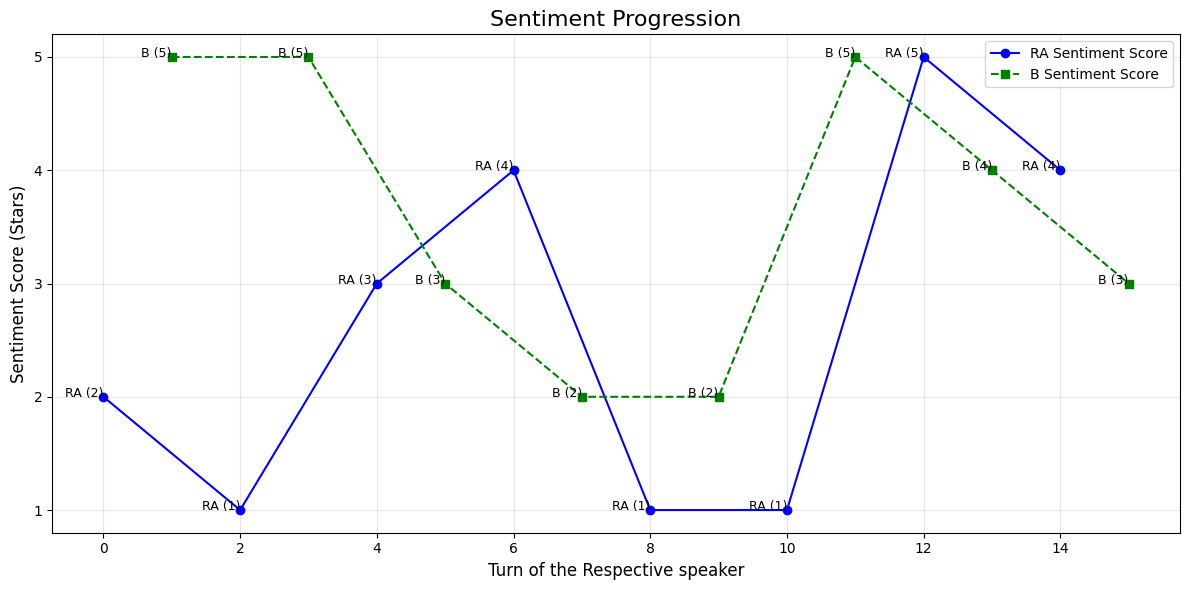

In [24]:
import matplotlib.pyplot as plt


turn_indices_ra = [i for i, turn in enumerate(conversation) if turn['speaker'] == "RA"]
turn_indices_b = [i for i, turn in enumerate(conversation) if turn['speaker'] == "B"]

sentiment_scores_ra = [turn['score'] for turn in conversation if turn['speaker'] == "RA"]
sentiment_scores_b = [turn['score'] for turn in conversation if turn['speaker'] == "B"]


plt.figure(figsize=(12, 6))


plt.plot(
    turn_indices_ra,
    sentiment_scores_ra,
    marker='o',
    label='RA Sentiment Score',
    color='blue',
    linestyle='-'
)


plt.plot(
    turn_indices_b,
    sentiment_scores_b,
    marker='s',
    label='B Sentiment Score',
    color='green',
    linestyle='--'
)


for i, turn in enumerate(conversation):
    plt.text(
        i,
        turn['score'],
        f"{turn['speaker']} ({turn['score']})",
        fontsize=9,
        ha='right'
    )


plt.title('Sentiment Progression', fontsize=16)
plt.xlabel('Turn of the Respective speaker', fontsize=12)
plt.ylabel('Sentiment Score (Stars)', fontsize=12)


plt.grid(alpha=0.3)


plt.yticks(range(1, 6))


plt.legend()


plt.tight_layout()
plt.show()
